In [1]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


Importing plotly failed. Interactive plots will not work.


In [2]:
df

,Date,Open,High,Low,Close,Volume,Name
0,2006-01-03,39.69,41.22,38.79,40.91,24232729,AABA
1,2006-01-04,41.22,41.90,40.77,40.97,20553479,AABA
2,2006-01-05,40.93,41.73,40.85,41.53,12829610,AABA
3,2006-01-06,42.88,43.57,42.80,43.21,29422828,AABA
4,2006-01-09,43.10,43.66,42.82,43.42,16268338,AABA
...,...,...,...,...,...,...,...
3014,2017-12-22,71.42,71.87,71.22,71.58,10979165,AABA
3015,2017-12-26,70.94,71.39,69.63,69.86,8542802,AABA
3016,2017-12-27,69.77,70.49,69.69,70.06,6345124,AABA
3017,2017-12-28,70.12,70.32,69.51,69.82,7556877,AABA


In [3]:
df['Value'] = (df.Open+df.High+df.Low+df.Close)/4

In [4]:
df=df[['Date','Value']]

In [5]:
df = df.rename(columns={'Date': 'ds',
                        'Value': 'y'})

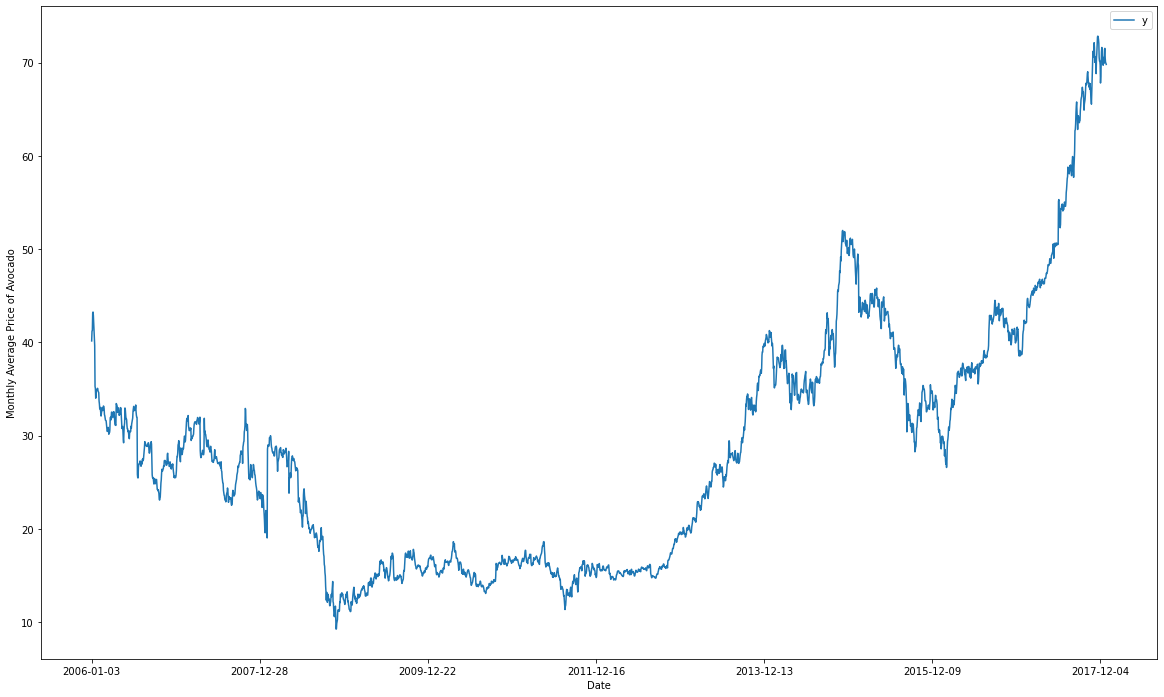

In [6]:
ax = df.set_index('ds').plot(figsize=(20, 12))
ax.set_ylabel('Monthly Average Price of Avocado')
ax.set_xlabel('Date')

plt.show()

In [7]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(periods=500)
forecast = m.predict(future)
forecast

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2006-01-03,35.371874,31.338619,39.251013,35.371874,35.371874,-0.245387,-0.245387,-0.245387,-0.771488,-0.771488,-0.771488,0.526101,0.526101,0.526101,0.0,0.0,0.0,35.126487
1,2006-01-04,35.349835,31.027333,39.016129,35.349835,35.349835,-0.289291,-0.289291,-0.289291,-0.800615,-0.800615,-0.800615,0.511324,0.511324,0.511324,0.0,0.0,0.0,35.060545
2,2006-01-05,35.327797,31.337670,38.994285,35.327797,35.327797,-0.284948,-0.284948,-0.284948,-0.776383,-0.776383,-0.776383,0.491435,0.491435,0.491435,0.0,0.0,0.0,35.042848
3,2006-01-06,35.305758,31.031529,39.220648,35.305758,35.305758,-0.265002,-0.265002,-0.265002,-0.730784,-0.730784,-0.730784,0.465782,0.465782,0.465782,0.0,0.0,0.0,35.040756
4,2006-01-09,35.239642,30.629150,38.926257,35.239642,35.239642,-0.384594,-0.384594,-0.384594,-0.734122,-0.734122,-0.734122,0.349529,0.349529,0.349529,0.0,0.0,0.0,34.855048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3514,2019-05-09,82.372357,65.279208,96.687151,66.648726,97.522651,-0.586577,-0.586577,-0.586577,-0.776383,-0.776383,-0.776383,0.189806,0.189806,0.189806,0.0,0.0,0.0,81.785780
3515,2019-05-10,82.411124,66.235309,96.870989,66.596477,97.608090,-0.558713,-0.558713,-0.558713,-0.730784,-0.730784,-0.730784,0.172071,0.172071,0.172071,0.0,0.0,0.0,81.852411
3516,2019-05-11,82.449891,67.700940,99.562618,66.544495,97.693529,2.062205,2.062205,2.062205,1.906697,1.906697,1.906697,0.155508,0.155508,0.155508,0.0,0.0,0.0,84.512096
3517,2019-05-12,82.488659,68.138003,99.683228,66.492637,97.778968,2.047415,2.047415,2.047415,1.906697,1.906697,1.906697,0.140718,0.140718,0.140718,0.0,0.0,0.0,84.536073


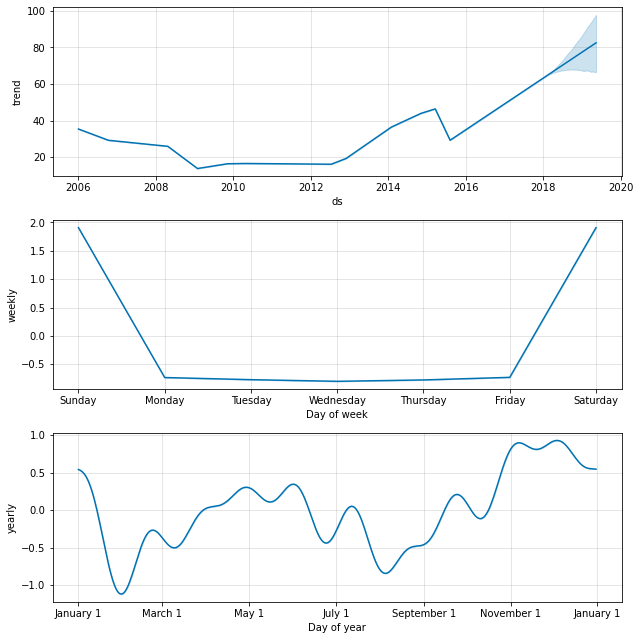

In [8]:
fig2 = m.plot_components(forecast)

In [9]:
forecastnew = forecast['ds']
forecastnew2 = forecast['yhat']

forecastnew = pd.concat([forecastnew,forecastnew2], axis=1)

mask = (forecastnew['ds'] > "2017-12-28") & (forecastnew['ds'] <= "2019-05-13")
forecastedvalues = forecastnew.loc[mask]

mask = (forecastnew['ds'] > "2006-01-03") & (forecastnew['ds'] <= "2017-12-29")
forecastnew = forecastnew.loc[mask]

Red = Predicted Values, Blue = Base Values


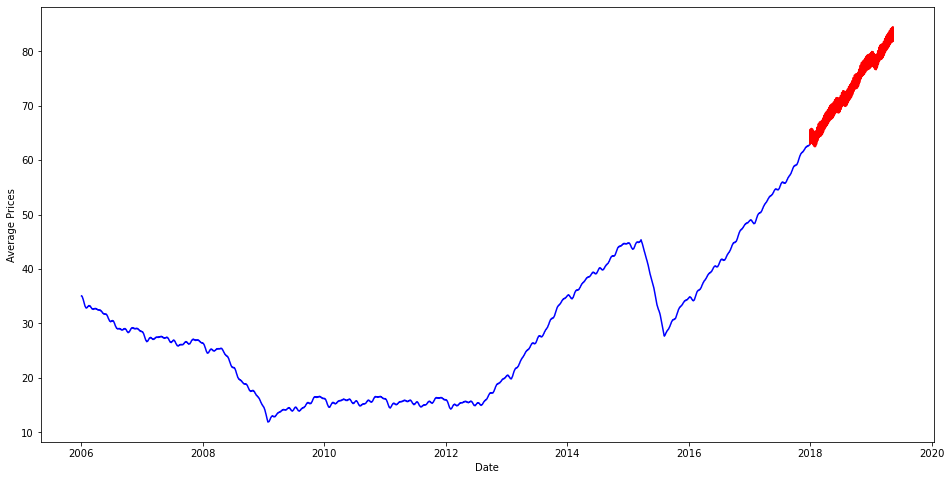

In [10]:
fig, ax1 = plt.subplots(figsize=(16, 8))
ax1.plot(forecastnew.set_index('ds'), color='b')
ax1.plot(forecastedvalues.set_index('ds'), color='r')
ax1.set_ylabel('Average Prices')
ax1.set_xlabel('Date')
print("Red = Predicted Values, Blue = Base Values")